# **<a id="Content"></a>**
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 7px">Table of Content</h2>

[**<span style="color:#023e8a;">1. Dataset Introduction</span>**](#1)  
[**<span style="color:#023e8a;">2. Exploratory Data Analysis</span>**](#2)  
[**<span style="color:#023e8a;">3. Data Preparation</span>**](#3)  
[**<span style="color:#023e8a;">4. i) Model Training and Evaluation (Manual Tuning)</span>**](#4)  
[**<span style="color:#023e8a;">4. ii) Model Training and Evaluation (K Fold and Grid Search)</span>**](#5)

<a id="1"></a>
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #023e8a; color :#FEF1FE   ; text-align: center; border-radius: 5px 5px; padding: 7px">1. Dataset Introduction</h2>

The dataset contains information about the <b>top 1000 movies listed on the Internet Movie Database</b>, also known as <b>IMDb</b>. This website is the world's most popular and authoritative source for movie, TV and celebrity content. The website also includes ratings and reviews for each movie and TV shows. 

<br>
<img src = "Table1.png", style = "width: 500px";>

Based on the dataset, here are the attributes that can be classify as categorical and numerical values:

- Categorical:

    * Certificate
    * Genre

- Numerical:

    * Released_Year
    * IMDB_Rating
    * No_of_Votes
    * Gross

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

<a id="2"></a>
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #023e8a; color :#FEF1FE   ; text-align: center; border-radius: 5px 5px; padding: 7px">2. Exploratory Data Analysis</h2>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Suppress warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# Load csv file and save as dataframe 'df'
df = pd.read_csv('imdb_top_1000.csv')

In [4]:
# Display the first 5 rows
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
# Shape of dataframe
df.shape

(1000, 16)

The dataframe consists of 1000 rows and 16 columns.

In [6]:
# Column names of dataframe
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [7]:
# Drop specified columns from the dataframe
df.drop(['Poster_Link', 'Series_Title', 'Overview'], axis=1, inplace=True)

The columns are being dropped as they do not contribute meaningful information to the analysis. This helps to focus on the essential variables and simplify the dataset.

In [8]:
# Column names of dataframe
df.columns

Index(['Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating',
       'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4',
       'No_of_Votes', 'Gross'],
      dtype='object')

These are the columns selected for further analysis.

In [9]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  1000 non-null   object 
 1   Certificate    899 non-null    object 
 2   Runtime        1000 non-null   object 
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     843 non-null    float64
 6   Director       1000 non-null   object 
 7   Star1          1000 non-null   object 
 8   Star2          1000 non-null   object 
 9   Star3          1000 non-null   object 
 10  Star4          1000 non-null   object 
 11  No_of_Votes    1000 non-null   int64  
 12  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 101.7+ KB


This indicates details such as the number of non-null values, data types of each column and memory usage for a better understanding on the dataframe structure.

In [10]:
# Descriptive statistics of dataframe
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


The descriptive statistics provide a comprehensive overview of three numerical columns in the dataset: 'IMDB_Rating', 'Meta_score' and 'No_of_Votes'. This provide key insights into the distribution and central tendency of these variables.

For 'IMDB_Rating,' the statistics reveal that the ratings range from 7.6 to 9.3, with an average rating of approximately 7.95. The majority of movies fall within the interquartile range (25th to 75th percentile) between 7.7 and 8.1.

Regarding 'Meta_score,' the scores range from 28 to 100, with an average score of around 77.97. The interquartile range for meta-scores lies between 70 and 87, indicating the central tendency of critical ratings for the majority of movies.

For 'No_of_Votes,' the count shows that all 1000 movies have recorded votes. The number of votes ranges from 25088 to 2343110, with an average of approximately 273693. The interquartile range spans from 55526 to 374161, representing the distribution of votes among the movies.

In [11]:
# Check for duplicated rows
df[df.duplicated()]

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


There are no rows in the dataframe that are identical to each other across all columns.

In [12]:
# Check for missing values in each column
df.isna().sum()

Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

This indicates the number of missing values for each respective column of a dataframe. 'Certificate' has 101 missing values, 'Meta_score' has 157 and 'Gross' has 169. 

In [13]:
# Calculate the percentage of missing values in each column
(df.isnull().sum() / len(df))*100

Released_Year     0.0
Certificate      10.1
Runtime           0.0
Genre             0.0
IMDB_Rating       0.0
Meta_score       15.7
Director          0.0
Star1             0.0
Star2             0.0
Star3             0.0
Star4             0.0
No_of_Votes       0.0
Gross            16.9
dtype: float64

This represents the percentage of missing values in each column which is a useful metric to understand the extent of missing data in dataset.

In [14]:
# Uniques values in 'Certificate' column
df['Certificate'].nunique()

16

In [15]:
# Mode of the 'Certificate' column
df['Certificate'].mode()

0    U
Name: Certificate, dtype: object

In [16]:
# Replace null values with 'U'
df['Certificate'].fillna('U', inplace = True)

Since most of the movies or tv shows are 'U' (general viewing for all ages) certified, hence null values in 'Certificate' column are being replaced with 'U'.

In [17]:
# Remove commas from the 'Gross' column
df['Gross'].replace(',', '', regex = True, inplace = True)

In [18]:
# Replace null values with 0
df["Gross"].replace(np.nan, 0, inplace = True)

In [19]:
# Convert the 'Gross' column to integer
df['Gross'] = df['Gross'].astype(int)

In [20]:
# Replace zero values in the 'Gross' column with its mean value
df['Gross'].replace(0, df['Gross'].mean(), inplace = True)

This sequence of operations aims to clean the 'Gross' column by handling missing values, removing commas from the numerical values, converting data types and imputing zero values with a meaningful estimate based on the mean.

In [21]:
# Fill null values in the 'Meta_score' column with its mean value
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)

Fills the null values in this 'Meta_score' column with the mean value of the existing scores, this approach is a common strategy for handling missing data.

In [22]:
# Check for missing values
df.isna().sum()

Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

The dataset is already clean from missing values.

In [23]:
# Extract the first word from the 'Runtime' column
df['Runtime'] = df['Runtime'].str.extract('([^\s]+)')

In [24]:
# Convert the 'Runtime' column to integer
df['Runtime'] = df['Runtime'].astype(int)

This aims to clean the 'Runtime' column by extracting the first word and converting the data types into integer.

In [25]:
# Unique values in the 'Released_Year' column
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [26]:
# Remove rows where 'Released_Year' is equal to 'PG'
df = df[df['Released_Year'] != 'PG']

In [27]:
# Convert the 'Released_Year' column to integer
df['Released_Year'] = df['Released_Year'].astype(int)

Filter out rows where 'Released_Year' is equal to the string 'PG' since 'PG' is not a valid year and should be excluded. Then, converting the data types into integer.

In [28]:
# Split the multiple genres in 'Genre' column into a list of genres
df['Genre'] = df['Genre'].str.split(',')

In [29]:
# Removed any leading or trailing whitespace from each genre
df['Genre'] = df['Genre'].apply(lambda x : [i.strip() for i in x])

In [30]:
# Explode the lists in the 'Genre' column
df_exploded = df.explode('Genre')

In [31]:
# Count and sort 'Genre'
genre_counts = df_exploded['Genre'].value_counts()

sorted_genres = genre_counts.sort_values(ascending=False).index

This sequence of operations on the 'Genre' column begins with splitting the comma-separated genres into lists, removing any leading or trailing whitespaces from each genre label and transform the lists into separate rows, duplicating the original rows as needed. Finally, creating a sorted list based on the genre frequencies in descending order, with the most prevalent genres listed first.

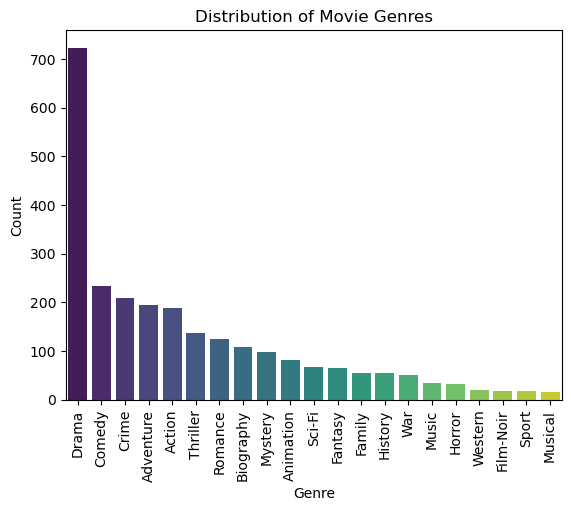

In [32]:
# Count plot of distribution of movie genres
color_palette = sns.color_palette("viridis", n_colors = len(sorted_genres))
sns.countplot(data = df_exploded, x = 'Genre', order = sorted_genres, palette = color_palette)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

The histogram plot visually represents the distribution of movie genres in the dataset. Each bar on the graph corresponds to a specific genre, with the x-axis indicating the genres and the y-axis representing the count or frequency of movies belonging to each genre. The histogram reveals that the drama genre has the highest count among the top movies, suggesting it is the most prevalent genre. On the other hand, the musical genre exhibits the lowest count, indicating that it is less represented among the top movies.This information provides insights into the popularity of specific genres among the top movies.

In [33]:
# 'Released_Year' column in descending order
released_year_desc = df['Released_Year'].sort_values(ascending=False)

In [34]:
released_year_desc

613    2020
18     2020
464    2020
205    2020
612    2020
       ... 
193    1925
194    1924
568    1922
127    1921
321    1920
Name: Released_Year, Length: 999, dtype: int32

Sort the 'Released_Year' column in order to identify the range of year that the movies being released.

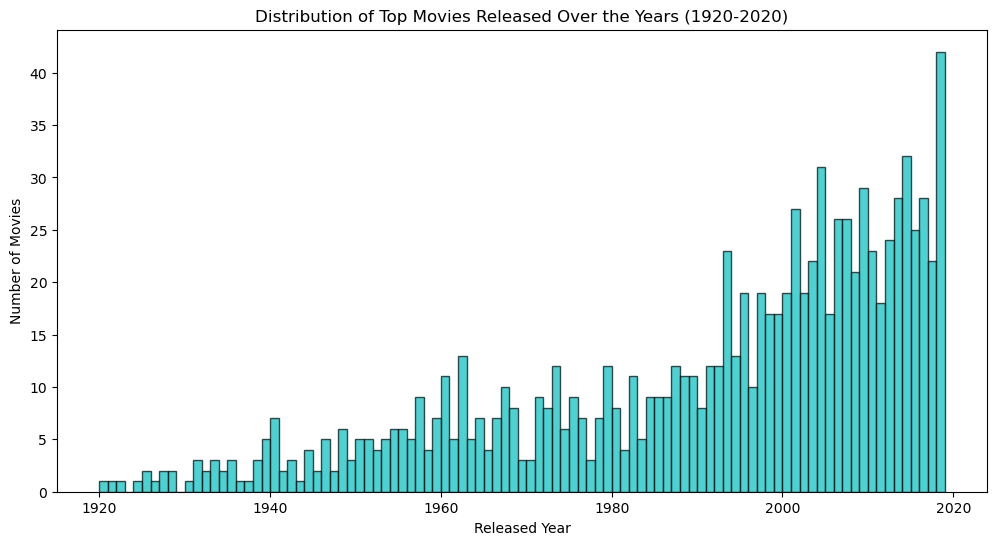

In [35]:
# Histogram of Distribution of top movies released over the years
plt.figure(figsize=(12, 6))
plt.hist(df['Released_Year'], bins=range(1920, 2020), color='c', edgecolor='black', alpha=0.7)
plt.title('Distribution of Top Movies Released Over the Years (1920-2020)')
plt.xlabel('Released Year')
plt.ylabel('Number of Movies')
plt.grid(False)
plt.show()

The histogram plot illustrates the distribution of top movies released over the years from 1920 to 2020. Each bar on the graph represents a specific year, with the x-axis denoting the released year and the y-axis representing the number of movies released. The histogram reveals a general increasing trend in the number of top movies released over the specified period, reaching its peak in 2020. This suggests a growth or surge in the production or recognition of noteworthy films in recent years, potentially influenced by evolving trends, technologies or audience preferences.

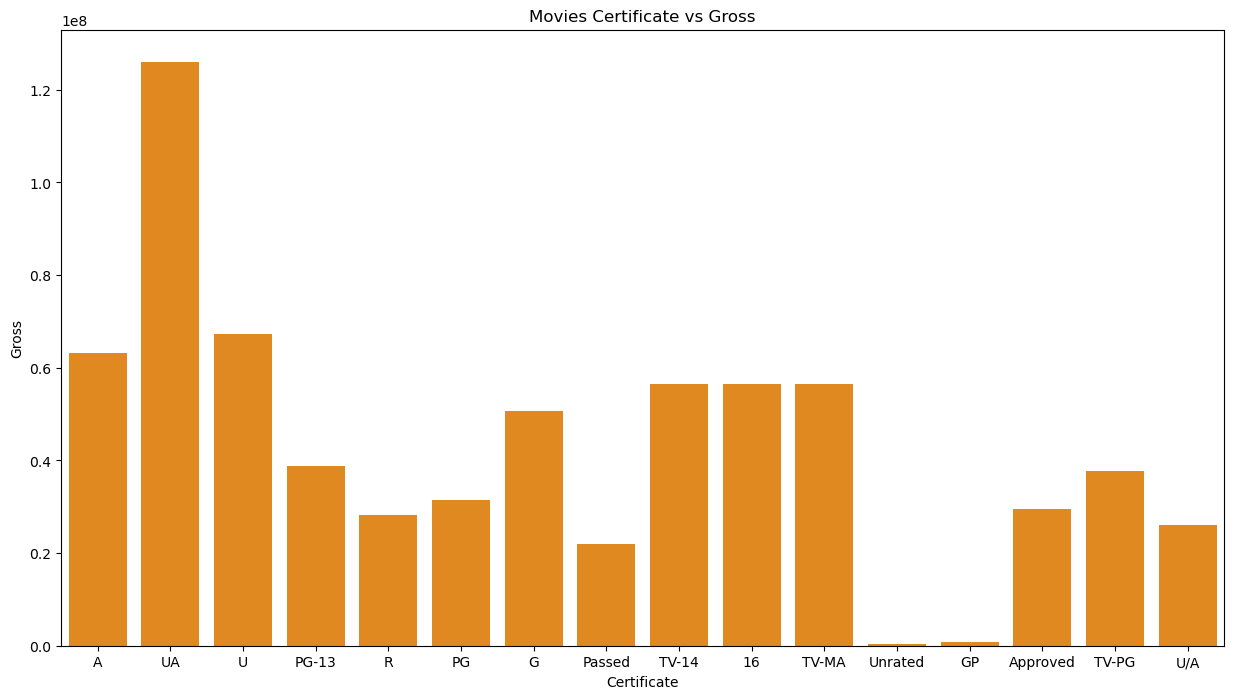

In [36]:
# Bar plot of movies certificate against gross
plt.figure(figsize = (15, 8))
sns.barplot(x = 'Certificate', y = 'Gross', color = 'darkorange', data = df, ci = False)
plt.title('Movies Certificate vs Gross')
plt.show()

The histogram plot compares the gross earnings of movies across different certificates, displaying the relationship between movie certification ratings and their gross earning. The histogram emphasizes that movies with a 'UA' certificate tend to achieve the highest earnings. Conversely, movies labeled as 'Unrated' show the least earnings on average.

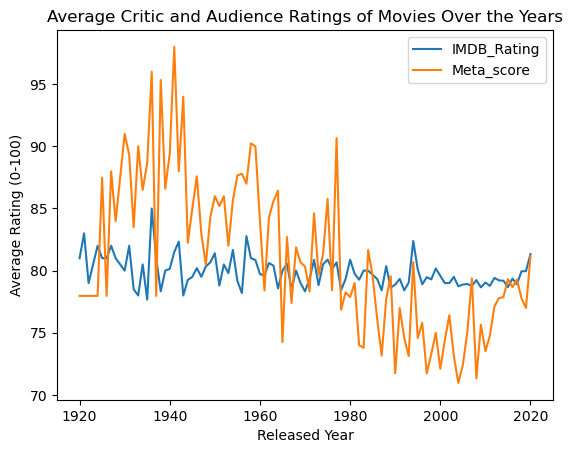

In [37]:
# Convert 'IMDB_Rating' column to the same scale as 'Meta_score'
df['IMDB_Rating'] = df['IMDB_Rating'] * 10

# Line plot of average audience and critic ratings of movies over the years
plt.plot('IMDB_Rating',data = df.groupby('Released_Year')[['IMDB_Rating','Meta_score']].mean())
plt.plot('Meta_score', data = df[df['Meta_score']!=0].groupby('Released_Year')[['IMDB_Rating','Meta_score']].mean())
plt.title('Average Critic and Audience Ratings of Movies Over the Years')
plt.xlabel('Released Year')
plt.ylabel('Average Rating (0-100)')
plt.legend()
plt.show()

Metascore and IMDb rating are distinct metrics used to evaluate movies, reflecting the perspectives of professional critics and general audiences, respectively. Metascore aggregates reviews from reputable critics, providing a weighted average score on a scale of 0 to 100. It offers a critical consensus and categorizes movies into bands, such as Universal Acclaim or Generally Favorable Reviews. On the other hand, IMDb rating relies on user-generated scores ranging from 1 to 10, with each user's vote carrying equal weight. IMDb reflects the collective opinion of the general audience and while it lacks predefined categories, it offers a straightforward average of user scores. Filmmakers and viewers often consider both metrics to gain comprehensive insights into a movie's reception, considering the perspectives of both critics and the public.

The line plot illustrating the average critic and audience ratings  of movies over the years. The output analysis indicates that over the years, there has been a decline in critic ratings, suggesting a general decrease in critical acclaim for movies. However, the plot reveals a trend in the 20th century, critic ratings began to rise again, potentially indicating a resurgence in critical appreciation for films during that period. On the other hand, audience ratings have remained relatively stable or experienced a positive trend over the years. The observed fluctuations in critic ratings may be indicative of changing critical standards or trends in the film industry, while the stability or improvement in audience ratings suggests consistent or growing appeal to moviegoers.

In [38]:
# Calculate and sort the average runtime for each year
average_runtime_by_year = df.groupby('Released_Year')['Runtime'].mean()

sorted_runtime = average_runtime_by_year.sort_values(ascending=False)

sorted_runtime

Released_Year
1930    152.0
1965    151.5
1970    143.0
1956    140.8
1996    137.2
        ...  
1932     78.5
1920     76.0
1921     68.0
1926     67.0
1924     45.0
Name: Runtime, Length: 99, dtype: float64

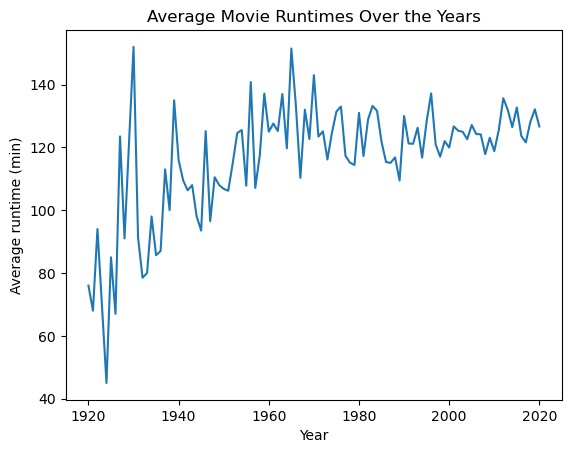

In [39]:
df.groupby('Released_Year')['Runtime'].mean().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average runtime (min)')
plt.title('Average Movie Runtimes Over the Years')
plt.show()

The line plot illustrates the evolution of average movie runtimes over the years. In the early 1900s, films tended to have shorter runtimes, possibly reflecting the cinematic norms and storytelling styles of that era. However, as time progressed there was a notable increase in average runtimes, reaching a peak around 1965 with an average of 149 minutes. From the 1960s onwards, movies generally maintained a consistent average runtime in the range of 120-140 minutes.

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Outliers</h2>

Outliers are data points that significantly differ from the rest of the data in a dataset. In other words, they are unusually large or small compared to the majority of the data points in a dataset.

Identifying and handling outliers is an important step in the data preprocessing and analysis process because they can have a significant impact on statistical measures and machine learning models. Common methods for detecting outliers include statistical measures such as the Interquartile Range (IQR) and visual methods such as box plots or scatter plots.

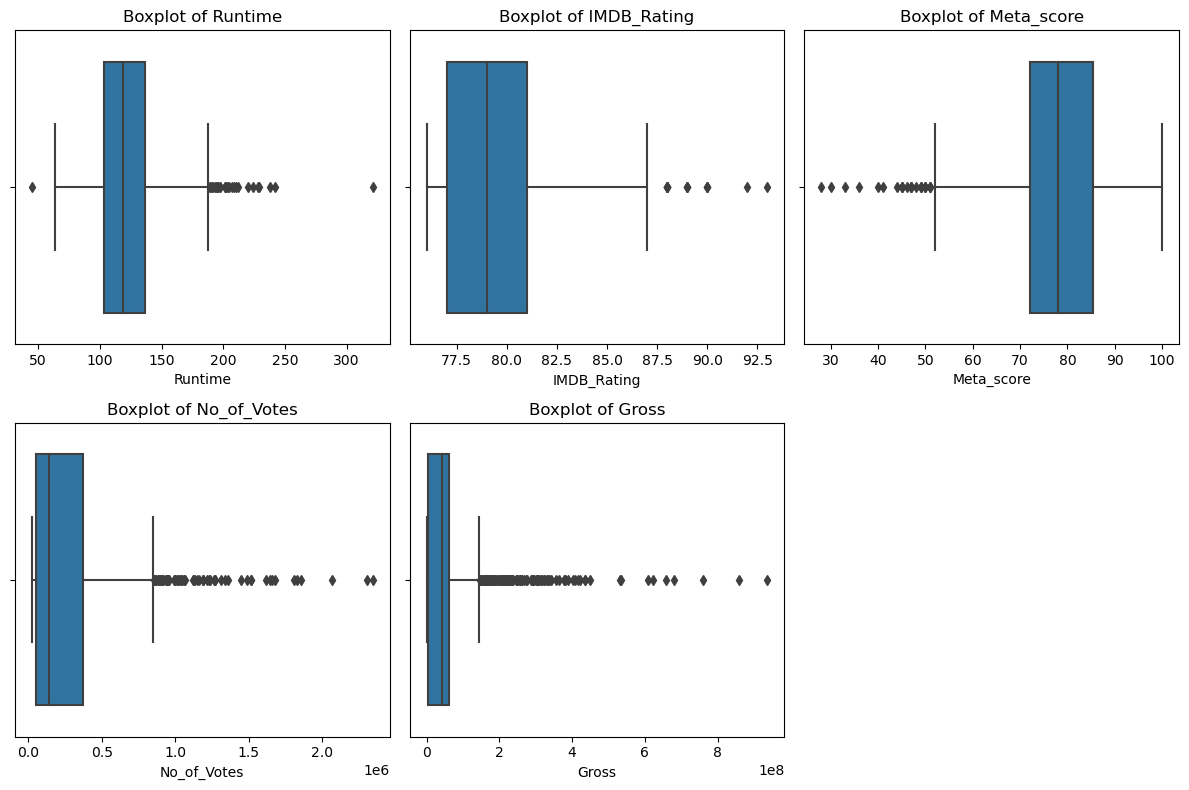

In [40]:
# Selected columns for boxplots
columns = ['Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

plt.figure(figsize = (12, 8))
for column in columns:
    plt.subplot(2, 3, columns.index(column) + 1)
    sns.boxplot(x = df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In a boxplot, the presence of outliers is identified by individual data points that fall outside the "whiskers" of the box. Outliers are data values that deviate significantly from the central tendency of the dataset. Visually inspecting each boxplot, one can observe points beyond the whiskers, indicating the existence of outliers in the 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes' and 'Gross' columns.

There are four techniques for managing outliers:
- Complete removal of outliers, which can help maintain a cleaner dataset but may result in the loss of potentially valuable information. 

- Treating outliers as missing values and applying data imputation techniques offers a way to retain the entire dataset, relying on methods to estimate missing values accurately.

- Discretization which involves grouping continuous data into discrete intervals. By applying discretization to the dataset, outliers are incorporated into specific bins, allowing for a balance between outlier inclusion and managing their impact on statistical analyses.

- Capping or censoring outliers involves replacing extreme values with predefined upper and lower limits. This method aims to mitigate the influence of outliers without entirely removing them from the dataset.

In this analysis, the capping method which utilizes the lower and upper bounds based on the quartiles and the calculated IQR is used to handle outliers as it provides a practical way by maintaining a balance between outlier removal and preserving the overall distribution of the data.

In [41]:
# Handle outliers across multiple columns using IQR method
for column in columns:
    
    # Calculate IQR
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)

    # Define lower and upper bounds
    lower_limit = df[column].quantile(0.25) - (IQR * 1.5)
    upper_limit = df[column].quantile(0.75) + (IQR * 1.5)

    # Replace outliers with the upper/lower limit
    df[column] = np.where(df[column] > upper_limit, upper_limit, np.where(df[column] < lower_limit, lower_limit, df[column]))

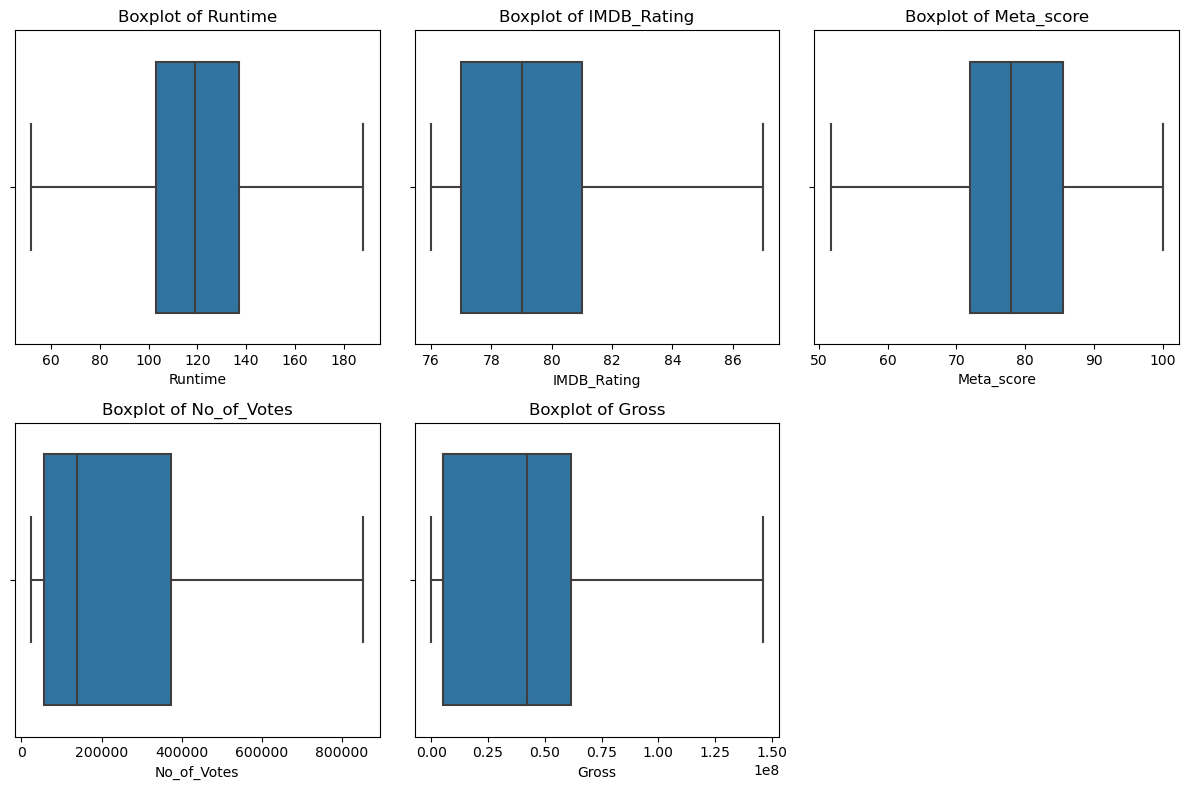

In [42]:
# Boxplots after capping outliers
columns = ['Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

plt.figure(figsize=(12, 8))
for column in columns:
    plt.subplot(2, 3, columns.index(column) + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

The modified boxplots after outlier capping provide a clearer and more accurate representation of the central tendency and variability in the dataset, as extreme values that could skew the interpretation are addressed.

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Data Discretization</h2>

Data discretization is a process in data preprocessing that involves converting continuous data into discrete categories or bins. It involves dividing a range of continuous values into a set of intervals or bins and assigning data points to these bins based on their values. This transformation is often done to simplify the analysis, reduce noise or meet the requirements of certain algorithms that work better with categorical or discrete data.

There are two main types of data discretization:

1. **Equal-Width Discretization (Binning):**
   - This method divides the range of values into equal-width intervals or bins. The width of each bin is the same, but the number of data points in each bin may vary.

<br>

2. **Equal-Frequency Discretization:**
   - This method divides data points into intervals in such a way that each bin contains approximately the same number of data points. The width of the intervals may vary, but the goal is to ensure equal frequency in each bin.

In [43]:
# Define the bin edges and labels
bin_edges = [0, 65, 85, 100]
bin_labels = ['Negative', 'Average', 'Positive']

# New column 'Meta_score_Category' with the assigned categories
df['Meta_score_Category'] = pd.cut(df['Meta_score'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the updated dataframe
df[['Meta_score', 'Meta_score_Category']].head()

,Meta_score,Meta_score_Category
0,80.0,Average
1,100.0,Positive
2,84.0,Average
3,90.0,Positive
4,96.0,Positive


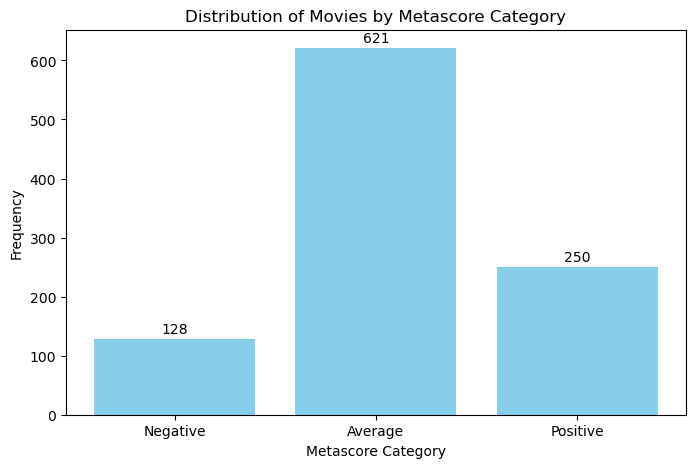

In [44]:
# Count of discretized data
votes_counts = df['Meta_score_Category'].value_counts()

# Sort the value counts in the desired order (Negative, Average, Positive)
votes_counts = votes_counts.reindex(['Negative', 'Average', 'Positive'])

# Histogram plot
plt.figure(figsize=(8, 5))
plt.bar(votes_counts.index, votes_counts, color='skyblue')
plt.title('Distribution of Movies by Metascore Category')
plt.xlabel('Metascore Category')
plt.ylabel('Frequency')

# Customize x-axis labels based on value counts
for i, value in enumerate(votes_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.show()

The data discretization to the 'Meta_score' column categorizing movie meta score into three distinct categories: 'Negative', 'Average' and 'Positive'. The histogram plot visually represents the distribution of movies across these score categories. In this specific case, there are 128 movies categorized as 'Negative' scores, 621 as 'Average' scores and 250 as 'Positive' scores. This information gives better understanding on patterns in movie meta score and can be informative for decision-making processes related to content creation.

It is important to note that the Metascore is not the sole indicator of a movie or TV show's quality or enjoyment. Personal taste and preferences play a significant role in determining whether a particular film or show is enjoyable to an individual viewer. It is always a good idea to read individual reviews, consider the genre and subject matter and watch trailers or previews to form  own opinion.

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Summary</h2>

The analysis of the top 1000 movies on IMDb provides valuable insights for both filmmakers and audiences. Firstly, it highlights genre-specific insights among the top movies, enables a more targeted approach to content creation based on the popularity of particular genres among the audience. Besides, filmmakers also can leverage from movie release trends over the years to strategically plan their movie releases.

The insight from financial success and certification could guide filmmakers in making certification decisions to enhance the commercial performance of their movies. Furthermore, from the analysis of average audience and critic ratings, filmmakers can adapt their content to align with changing perspectives and preferences, ensuring resonance with their target audiences.

The analysis on average movie runtimes allows filmmakers to tailor their content to meet audience expectations regarding movie duration. The categorization of IMDb ratings offering insights into the distribution of ratings and factors influencing audience perceptions.

Overall, these insights empower filmmakers and the film industry to make informed decisions regarding content creation, release strategiesand audience engagement. For audiences, the analysis offers a glimpse into the industry's dynamics and providing a better understanding of the patterns that shape the movies they consume.

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

<a id="3"></a>
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #023e8a; color :#FEF1FE   ; text-align: center; border-radius: 5px 5px; padding: 7px">3. Data Preparation</h2>

Data transformation is a crucial preprocessing step to ensure that the input data is suitable for the chosen machine learning algorithm, addressing issues related to scale, format, missing values and distribution characteristics. The choice of transformation techniques depends on the nature of the data and the requirements of the specific machine learning algorithm being used.

In [45]:
# Import libraries
from sklearn.preprocessing import MultiLabelBinarizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Target Variable</h2>

The 'Meta_score_Category' column is used as the target variable for classification model. This categorical target variable represents the classification labels that the model aims to predict based on the given features in the dataset. The goal of the classification model is to learn patterns and relationships within the data to accurately classify movies into these predefined 'Meta_score_Category' classes. 

The Metascore on IMDb is a weighted average of the scores given by professional critics to a particular movie or TV show. It is calculated by Metacritic, a website that aggregates reviews from a variety of sources and assigns a numerical score to each one. The Metascore is a way to quickly get a sense of what the critical consensus is on a particular piece of media. It is based on a scale of 0-100, with higher scores indicating better reviews.

The interpretation of a "good" Metascore for a movie or TV show can vary depending on individual preferences and expectations. However, generally speaking, a Metascore above 85 is often considered favorable and indicative of critical acclaim. This suggests that the majority of professional critics have given positive reviews to the film or TV show. Scores in the range of 65-84 are typically considered mixed or average, indicating a more mixed reception among critics. Scores below 65 generally suggest negative reviews or a lack of critical consensus. Hence, the target variable falls into 3 multiple classes:
- 'Negative': Meta_score below 65
- 'Average': Meta_score between 65 and 85
- 'Positive': Meta_score 85 and above

In [46]:
# Count of each Metascore class
df['Meta_score_Category'].value_counts()

Meta_score_Category
Average     621
Positive    250
Negative    128
Name: count, dtype: int64

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Encoding</h2>

Data encoding refers to the process of converting data from one form or format to another. In the context of machine learning and data analysis, data encoding typically involves transforming categorical or textual data into a numerical format that can be easily processed by machine learning algorithms.

There are two types of data encoding that will be applied in this data preparation:

1. **Label Encoding:**
   - Dealing with nominal categorical labels, where there is a meaningful order among the categories.
   - Each unique label is assigned a unique integer. This is often used when the categories have an ordinal relationship.
   - For example, categories 'Low,' 'Medium,' and 'High,' converting to 0, 1 and 2, respectively.

<br>

2. **One-Hot Encoding:**
   - Dealing with nominal categorical variables where there is no inherent order among the categories. One-hot encoding is also preferred when dealing with a large number of unique categories in a variable.
   - Creates binary columns for each category and represents the presence or absence of that category with 1 or 0, false or true respectively.
   - For example, converting ["dog", "cat", "dog"] to a one-hot encoded representation would be [[1, 0], [0, 1], [1, 0]].

#### Label Encoding

In [47]:
# Create a label encoder instance
label_encoder = LabelEncoder()

In [48]:
# Apply label encoding to the 'Meta_score_Category' column
df['Meta_score_Label'] = label_encoder.fit_transform(df['Meta_score_Category'])

In [49]:
# Display the first few rows of the DataFrame with the encoded column
df[['Meta_score', 'Meta_score_Category', 'Meta_score_Label']].head()

,Meta_score,Meta_score_Category,Meta_score_Label
0,80.0,Average,0
1,100.0,Positive,2
2,84.0,Average,0
3,90.0,Positive,2
4,96.0,Positive,2


#### One-Hot Encoding

Both pd.get_dummies and MultiLabelBinarizer from scikit-learn are used for one-hot encoding, but they have some differences in terms of use cases and functionalities.

1. **pd.get_dummies:**
   - Suitable for one-hot encoding categorical variables where each observation belongs to only one category (single-label).

<br>

2. **MultiLabelBinarizer:**
    - Typically used when dealing with multilabel data where each observation can belong to multiple categories. Can handle situations where a sample has multiple labels across different categories.

In [50]:
# A list of columns to be one-hot encoded
columns = ['Certificate', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']

# One-hot encode the specified columns
df = pd.get_dummies(df, columns=columns)

One-hot encode of pd.getdummies is used as each observation belong to only one category in each of these columns and there is no multilabel scenario.

In [51]:
df

,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,Meta_score_Category,Meta_score_Label,Certificate_16,...,Star4_Yûnosuke Itô,Star4_Zac Mattoon O'Brien,Star4_Zach Grenier,Star4_Zarah Jane McKenzie,Star4_Zeppo Marx,Star4_Ziyi Zhang,Star4_Zoe Saldana,Star4_Zoë Kravitz,Star4_Álvaro Guerrero,Star4_Émile Vallée
0,1994,142.0,[Drama],87.0,80.0,852986.5,2.834147e+07,Average,0,False,...,False,False,False,False,False,False,False,False,False,False
1,1972,175.0,"[Crime, Drama]",87.0,100.0,852986.5,1.349664e+08,Positive,2,False,...,False,False,False,False,False,False,False,False,False,False
2,2008,152.0,"[Action, Crime, Drama]",87.0,84.0,852986.5,1.459574e+08,Average,0,False,...,False,False,False,False,False,False,False,False,False,False
3,1974,188.0,"[Crime, Drama]",87.0,90.0,852986.5,5.730000e+07,Positive,2,False,...,False,False,False,False,False,False,False,False,False,False
4,1957,96.0,"[Crime, Drama]",87.0,96.0,689845.0,4.360000e+06,Positive,2,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1961,115.0,"[Comedy, Drama, Romance]",76.0,76.0,166544.0,5.653688e+07,Average,0,False,...,False,False,False,False,False,False,False,False,False,False
996,1956,188.0,"[Drama, Western]",76.0,84.0,34075.0,5.653688e+07,Average,0,False,...,False,False,False,False,False,False,False,False,False,False
997,1953,118.0,"[Drama, Romance, War]",76.0,85.0,43374.0,3.050000e+07,Average,0,False,...,False,False,False,False,False,False,False,False,False,False
998,1944,97.0,"[Drama, War]",76.0,78.0,26471.0,5.653688e+07,Average,0,False,...,False,False,False,False,False,False,False,False,False,False


The 'Genre' column contains lists of genres associated with each movie, in the other word each movie can belong to multiple genres. Hence, MultiLabelBinarizer is used to one-hot encode these genres into binary columns, indicating the presence or absence of each genre for each movie.

In [52]:
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

MultiLabelBinarizer is a utility class in scikit-learn used for transforming a list of lists or an iterable of sets into a binary format suitable for machine learning tasks. It is particularly useful when dealing with multi-label classification problems.

In [53]:
# Convert the one-hot encoded array to a dataframe
genre_encoded = pd.DataFrame(mlb.fit_transform(df['Genre']), columns=mlb.classes_, index = df.index)

In this case, 'Genre' column is being transformed into into a binary format (one-hot encoded array),  where each genre becomes a binary feature indicating its presence or absence for each movie. This encoded data is in a format that compatible with machine learning models, allowing the models to effectively learn from and make predictions on datasets containing categorical information.

In [54]:
genre_encoded

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
998,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


This indicates a new dataframe (df_encoded) with binary columns for each unique genre using one-hot encoding. The resulting dataframe will have 0s and 1s indicating the presence or absence of each genre for each movie.

In [55]:
# Concatenate the original dataframe (df) and the genre_encoded dataframe along the columns axis
df = pd.concat([df, genre_encoded], axis=1)

In [56]:
# Drop the original column
df.drop(['Released_Year', 'Genre', 'Meta_score', 'Meta_score_Category',], axis=1, inplace=True)

Dropping the original column of an encoded categorical variable is crucial to prevent data leakage.

In [57]:
df

,Runtime,IMDB_Rating,No_of_Votes,Gross,Meta_score_Label,Certificate_16,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,142.0,87.0,852986.5,2.834147e+07,0,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,175.0,87.0,852986.5,1.349664e+08,2,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,152.0,87.0,852986.5,1.459574e+08,0,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,188.0,87.0,852986.5,5.730000e+07,2,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,96.0,87.0,689845.0,4.360000e+06,2,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,115.0,76.0,166544.0,5.653688e+07,0,False,True,False,False,False,...,0,0,0,0,1,0,0,0,0,0
996,188.0,76.0,34075.0,5.653688e+07,0,False,False,False,True,False,...,0,0,0,0,0,0,0,0,0,1
997,118.0,76.0,43374.0,3.050000e+07,0,False,False,False,False,False,...,0,0,0,0,1,0,0,0,1,0
998,97.0,76.0,26471.0,5.653688e+07,0,False,False,False,False,False,...,0,0,0,0,0,0,0,0,1,0


<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Train Test Split</h2>

The "train-test split" is a fundamental step in the process of training and evaluating a machine learning model. It involves dividing the available dataset into two subsets: one for training the model and the other for testing its performance.

In [58]:
# 'Meta_score_Category' as the target variable
x = df.drop('Meta_score_Label', axis=1)  # Features
y = df['Meta_score_Label']  # Target variable

The feature set, x is obtained by dropping the column 'Meta_score_Label' from the dataframe. This assumes that 'Meta_score_Label' is the target variable, hence it is being exclude from the features.

In [59]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = y)

20% of the data will be used for testing and the remaining 80% will be used for training. Stratify sampling ensures that the class distribution in the target variable, y is preserved in the train-test split.

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Data Balancing</h2>

Data balancing is a technique used in machine learning to address class imbalance, where one class significantly outnumbers another in the dataset. Imbalanced datasets can lead to biased model training, where the model tends to favor the majority class and performs poorly on the minority class. Balancing the data involves either oversampling the minority class, undersampling the majority class or a combination of both. This ensures that the model is exposed to an equal representation of different classes during training, improving its ability to generalize across all classes and leading to more robust and fair predictions, particularly in scenarios where minority class samples are crucial but might be underrepresented. Data balancing is essential for achieving better model performance, especially in classification tasks with imbalanced class distributions.

Splitting the data into training and testing sets before any preprocessing steps (e.g., normalization, feature scaling) helps prevent data leakage. Data leakage occurs when information from the testing set inadvertently influences the training process, leading to overly optimistic performance estimates.

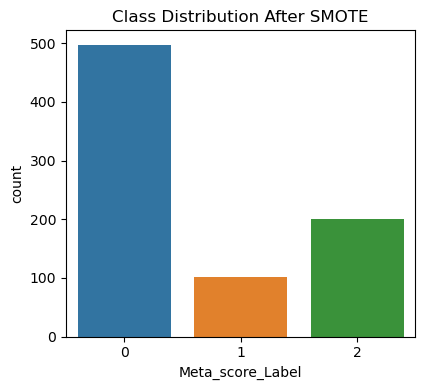

In [60]:
# Plot the class distribution before SMOTE
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 2)
sns.countplot(x = 'Meta_score_Label', data = pd.DataFrame({'Meta_score_Label': y_train}))
plt.title('Class Distribution After SMOTE')

plt.tight_layout()
plt.show()

In [61]:
# SMOTE instance
smote = SMOTE(random_state = 1)

In [62]:
# Apply SMOTE to the training set
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

Apply the Synthetic Minority Over-sampling Technique (SMOTE) to the training set of a machine learning dataset. SMOTE is used to address class imbalance by generating synthetic samples for the minority class, helping to balance the class distribution.

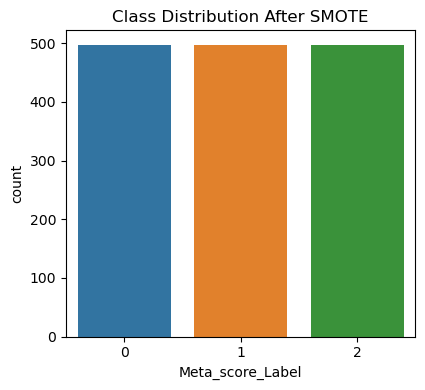

In [63]:
# Plot the class distribution after SMOTE
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 2)
sns.countplot(x = 'Meta_score_Label', data = pd.DataFrame({'Meta_score_Label': y_train_resampled}))
plt.title('Class Distribution After SMOTE')

plt.tight_layout()
plt.show()

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Data Normalization</h2>

Many machine learning algorithms, such as SVM, K-Nearest Neighbors and neural networks, are sensitive to the scale of the input features. Normalizing or standardizing the data ensures that all features have a similar scale, preventing certain features from dominating the learning process. Apply normalization or standardization to both the training and testing sets. 

In [64]:
# StandardScaler instance
scaler = StandardScaler()

In [65]:
# Fit the scaler to the training set and transform both training and test sets
normalized_x_train = scaler.fit_transform(x_train_resampled)
normalized_x_test = scaler.transform(x_test)

The fit_transform method is used on the training set (x_train). This step calculates the mean and standard deviation of each feature in the training set and then scales the features accordingly. While transform method is used on the testing set (x_test) without re-fitting the scaler. This ensures that the same transformation (mean and standard deviation) learned from the training set is applied to the testing set.

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

<a id="4"></a>
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 7px">4. i) Model Training and Evaluation (Manual Tuning)</h2>

A classification model is a type of machine learning model designed to assign predefined labels or categories to input data based on learned patterns from a labeled training dataset. The primary objective of a classification model is to accurately predict the categorical output for new, unseen instances. Parameter tuning in a classification model involves optimizing the hyperparameters, which are external configuration settings influencing the learning process. These hyperparameters include the learning rate, regularization strength and the number of features or layers in the model. The tuning process aims to find the optimal combination of hyperparameters that maximizes the model's performance metrics, such as accuracy, precision, recall and F1-score, on a validation set. Proper parameter tuning is crucial for enhancing the classification model's ability to generalize well to unseen data and make accurate predictions in real-world scenarios.

In [66]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Decision Tree</h2>

#### Working Mechanism:

- A Decision Tree recursively splits the dataset based on the features, creating a tree-like structure. At each node, the algorithm selects the feature that best separates the data into homogeneous groups, typically using metrics like Gini impurity or entropy. The process continues until a stopping criterion is met, such as a maximum depth or a minimum number of samples in a leaf node. To make a prediction for a new instance, it traverses the tree, following the decisions based on the feature values of the instance until it reaches a leaf node, which represents the predicted class.

#### Application:

- In a categorical classification task, Decision Trees can handle multiple classes by creating decision rules for each class at the leaf nodes. The final prediction is the majority class of instances reaching a leaf node.

#### Parameter Significance for Decision Tree:

random_state (int or RandomState, default=None):

- Seed for controlling the randomness of the estimator. Ensures that the random operations in the algorithm are reproducible, making it easier to debug and compare results.

criterion ({"gini", "entropy"}, default="gini"):

- Defines the quality measure for making splits in the tree. It can be either 'gini' for the Gini impurity or 'entropy' for information gain. Gini impurity and entropy measure the impurity or disorder in the data.

max_depth (int or None, default=None):

- Limits the depth of the tree, preventing overfitting. A deeper tree may capture more details in the training data but might not generalize well to unseen data. If None, nodes are expanded until they contain less than min_samples_split samples. 

min_samples_leaf (int or float, default=1):

- The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This parameter could prevent the creation of nodes that represent noise in the data.

min_samples_split (int or float, default=2):

- The minimum number of samples required to split an internal node. It helps control the size of the tree and prevent overfitting. If an integer, it represents the minimum number. If a float, it is a fraction and represents the minimum percentage of total samples.

splitter ({"best", "random"}, default="best"):

- The strategy used to choose the split at each node. 'best' chooses the best split and 'random' chooses the best random split. This parameter can introduce randomness and diversity in the tree.

min_weight_fraction_leaf (float, default=0.0):

- Minimum weighted fraction of the sum total of weights (if 'sample_weight' is passed) required to be at a leaf node.

max_features ({“auto”, “sqrt”, “log2”}, int, float, or None, default=None):

- Number of features to consider for the best split. It can be "auto" (sqrt), "sqrt" (sqrt), "log2" (log2), or a specific integer/float.

max_leaf_nodes (int or None, default=None):

- Grow trees with 'max_leaf_nodes' in best-first fashion. If None, unlimited number of leaf nodes.

min_impurity_decrease (float, default=0.0):

- A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_impurity_split (float, default=None):

- Threshold for early stopping in tree growth. If the impurity of a node is above the threshold, the node will be split.

ccp_alpha (non-negative float, default=0.0):

- Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than '0ccp_alpha will be chosen.

#### Decision Tree classifier with default parameter:

The provided code creates a Decision Tree classifier with default values for all parameters since no arguments are passed within the parentheses.

In [67]:
# Create a Decision Tree classifier with default parameters
dt_classifier = DecisionTreeClassifier()

# Fit the model to the training data
dt_classifier.fit(normalized_x_train, y_train_resampled)

# Predictions on the test data
y_pred = dt_classifier.predict(normalized_x_test)
print(y_pred)

# Performance metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')
f1 = f1_score(y_test, y_pred, average = 'micro')

# Print the results
print('Confusion matrix for Decision Tree:\n', cm)
print('Accuracy Decision Tree: %.3f' % accuracy)
print('Precision Decision Tree: %.3f' % precision)
print('Recall Decision Tree: %.3f' % recall)
print('F1-score Decision Tree: %.3f' % f1)

[0 0 2 1 1 2 0 0 1 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 1 0 0 0 0 2 0 2 1
 2 0 1 1 2 0 2 1 2 2 0 0 1 0 0 2 2 0 0 2 2 0 2 0 1 0 0 0 0 0 0 0 2 2 0 0 0
 0 0 0 0 1 0 2 0 0 2 0 1 0 0 0 0 0 0 0 0 0 2 2 2 0 0 1 2 0 2 0 2 0 1 2 0 1
 0 2 0 0 0 2 0 1 0 1 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 2 0 2 2 2 0 0 2 0 2 0
 0 0 2 0 2 1 1 0 0 2 0 0 0 0 2 0 2 1 1 1 2 0 0 0 1 0 1 2 0 0 1 0 0 2 0 0 2
 0 0 1 2 0 0 0 0 0 0 0 1 0 0 0]
Confusion matrix for Decision Tree:
 [[82 17 25]
 [15  5  6]
 [25  5 20]]
Accuracy Decision Tree: 0.535
Precision Decision Tree: 0.535
Recall Decision Tree: 0.535
F1-score Decision Tree: 0.535


This initializes a Decision Tree classifier trained on a dataset with normalized features and corresponding target labels. The model is configured with default parameters. The training data is then used to fit the model and predictions are generated for the test set. Subsequently, the code evaluates the performance of the Decision Tree classifier using various metrics.

The confusion matrix, a key component of the evaluation, displays the distribution of correct and incorrect predictions across different classes. The three classes in the 'Meta_score_Label' are 'Average' (0), 'Negative' (1) and 'Positive' (2). The resulting confusion matrix illustrates how many instances were correctly or incorrectly classified within each class. Rows represent actual classes and columns represent predicted classes. For example, there are 82 true positives for the 'Average' class, 5 true positive for the 'Negative' class and 20 true positives for the 'Positive' class. 82 instances of 'Average' class were correctly classified, 17 instances of 'Average' class were predicted as 'Negative' class and 25 instances of class 'Average' were predicted as 'Positive' class. 

The accuracy, precision, recall and F1-score metrics are then calculated to provide a comprehensive assessment of the model's performance. The accuracy of approximately 53.5% indicates the proportion of correctly classified instances out of the total. Precision measures the accuracy of positive predictions, recall assesses the coverage of actual positive instances and F1-score represents the balance between precision and recall. The obtained accuracy, precision, recall and F1-score metrics, all approximately equal to 0.535, indicated moderate overall model performance.

While the model achieves a moderate level of accuracy, further exploration could involve tuning hyperparameters or trying different algorithms to enhance performance. The provided evaluation metrics offer valuable insights into the strengths and weaknesses of the Decision Tree classifier within the context of the specific dataset and classification task.

#### Decision Tree classifier with parameter tuning:
- (random_state = 1, criterion = 'entropy', max_depth = 8, min_samples_leaf = 8, min_samples_split = 10, splitter = 'random')

This approach is focus on tuning specific aspects of the model while relying on default values for the remaining parameters.

In [68]:
# Create a Decision Tree classifier with specific parameters
dt_classifier = DecisionTreeClassifier(
    random_state = 1,
    criterion = 'entropy',
    max_depth = 8,
    min_samples_leaf = 8,
    min_samples_split = 10,
    splitter = 'random'
)

# Fit the model to the training data
dt_classifier.fit(normalized_x_train, y_train_resampled)

# Predictions on the test data
y_pred = dt_classifier.predict(normalized_x_test)

# Performance metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average =  'micro')
recall = recall_score(y_test, y_pred, average = 'micro')
f1 = f1_score(y_test, y_pred, average = 'micro')

# Print the results
print('Confusion matrix for Decision Tree:\n', cm)
print('Accuracy Decision Tree: %.3f' % accuracy)
print('Precision Decision Tree: %.3f' % precision)
print('Recall Decision Tree: %.3f' % recall)
print('F1-score Decision Tree: %.3f' % f1)

Confusion matrix for Decision Tree:
 [[114   9   1]
 [ 25   1   0]
 [ 46   3   1]]
Accuracy Decision Tree: 0.580
Precision Decision Tree: 0.580
Recall Decision Tree: 0.580
F1-score Decision Tree: 0.580


The Decision Tree classifier is configured with specific parameters for this iteration. Notably, the max_depth is set to 8, min_samples_leaf is set to 8, min_samples_split is set to 10 and the splitting criterion is set to 'entropy'. These parameters represent a tuned configuration aimed at improving the model's performance.The use of specific parameters in this iteration is intended to influence the decision-making process of the tree.

The confusion matrix displays the distribution of correct and incorrect predictions across different classes. There are 114 true positives for the 'Average' class, 1 true positive for the 'Negative' class and 1 true positives for the 'Positive' class. 114 instances of 'Average' class were correctly classified, 9 instances of 'Average' class were predicted as 'Negative' class and 1 instances of class 'Average' were predicted as 'Positive' class.

The overall accuracy of the model is 58%, meaning 58% of instances were correctly classified across all classes. The precision for this model is 58%, indicating that 58.0% of instances predicted as positive are indeed positive. The recall for this model is 58%, indicating that 58% of actual positive instances were correctly identified. F1-score represents the balance between precision and recall and the F1-score for this model is 58%.

In comparison to the default Decision Tree classifier, the tuned model with specific parameters shows improvements in accuracy, precision, recall and F1-score. The accuracy is now approximately 58%, indicating a better overall performance compared to the default model.

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Random Forest</h2>

#### Working Mechanism:

- Random Forest is an ensemble of Decision Trees. It builds multiple trees by bootstrapping the dataset and selecting a random subset of features for each tree. Each tree in the forest independently makes a prediction and the final prediction is determined by a majority vote (classification) or averaging (regression) of the individual tree predictions. The randomness introduced during training helps reduce overfitting and improves the model's generalization to new data.

#### Application:

- Random Forest works similarly to Decision Trees for categorical classification tasks but with the advantage of reducing overfitting and improving robustness.

#### Parameter Significance for Random Forest:

n_estimators (int, default=100):

- Number of trees in the forest. It controls the number of base learners (decision trees) in the ensemble.

criterion ({"gini", "entropy"}, default="gini"):

- Measure of quality for a split. It can be either 'gini' for the Gini impurity or 'entropy' for information gain.

max_depth (int or None, default=None):

- Maximum depth of the individual trees. If None, nodes are expanded until they contain less than 'min_samples_split' samples.

min_samples_split (int or float, default=2):

- Minimum number of samples required to split an internal node. It can be an integer or a fraction representing the minimum proportion of total samples.

min_samples_leaf (int or float, default=1):

- Minimum number of samples required to be at a leaf node. It can be an integer or a fraction representing the minimum proportion of total samples.

min_weight_fraction_leaf (float, default=0.0):

- Minimum weighted fraction of the sum total of weights (if 'sample_weight' is passed) required to be at a leaf node.

max_features ({“auto”, “sqrt”, “log2”}, int, float, or None, default="auto"):

- Number of features to consider for the best split. It can be "auto" (sqrt), "sqrt" (sqrt), "log2" (log2), or a specific integer/float.

random_state (int or RandomState, default=None):

- Seed for controlling the randomness of the estimator. Ensures that the random operations in the algorithm are reproducible, making it easier to debug and compare results.

max_leaf_nodes (int or None, default=None):

- Grow trees with 'max_leaf_nodes' in best-first fashion. If None, unlimited number of leaf nodes.

min_impurity_decrease (float, default=0.0):

- A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_impurity_split (float, default=None):

- Threshold for early stopping in tree growth. If the impurity of a node is above the threshold, the node will be split.

bootstrap (bool, default=True):

- Whether bootstrap samples are used when building trees. If True, each tree is fit on a bootstrap sample of the training data.

oob_score (bool, default=False):

- Whether to use out-of-bag samples to estimate the generalization accuracy.

n_jobs (int, default=None):

- Number of jobs to run in parallel for both fit and predict. If None, 1 job is used. If -1, the number of jobs is set to the number of CPU cores.

verbose (int, default=0):

- Controls the verbosity when fitting and predicting.

warm_start (bool, default=False):

- When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble.

class_weight ({"balanced", "balanced_subsample"}, dict, list of dicts, "None", "balanced" or "balanced_subsample", default=None):

- Weights associated with classes. It can be a dictionary, a list of dictionaries, "balanced", "balanced_subsample", or None.

ccp_alpha (non-negative float, default=0.0):

- Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than 'ccp_alpha' will be chosen.

max_samples (int or float, default=None):

- If bootstrap is True, the number of samples to draw from X to train each base estimator. If None, then draw 'X.shape[0] samples.


#### Random Forest classifier with default parameter:

The provided code creates a Random Forest classifier with default values for all parameters since no arguments are passed within the parentheses.

In [78]:
# Create a Random Forest classifier
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(normalized_x_train,y_train_resampled)

# Predictions on the test set
y_pred = rf.predict(normalized_x_test)

# Performance metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')

# Print the results
print('Confusion matrix for Random Forest:\n', cm)
print('Accuracy Random Forest: %.3f' % accuracy)
print('Precision Random Forest: %.3f' % precision)
print('Recall Random Forest: %.3f' % recall)
print('F1-score Random Forest: %.3f' % f1)

Confusion matrix for Random Forest:
 [[120   0   4]
 [ 26   0   0]
 [ 46   1   3]]
Accuracy Random Forest: 0.615
Precision Random Forest: 0.615
Recall Random Forest: 0.615
F1-score Random Forest: 0.615


This initializes a Random Forest classifier trained on a dataset with normalized features and corresponding target labels. The model is configured with default parameters.

The confusion matrix, a key component of the evaluation, displays the distribution of correct and incorrect predictions across different classes. The three classes in the 'Meta_score_Label' are 'Average' (0), 'Negative' (1) and 'Positive' (2). The resulting confusion matrix illustrates how many instances were correctly or incorrectly classified within each class. Rows represent actual classes and columns represent predicted classes. For example, there are 120 true positives for the 'Average' class, 0 true positive for the 'Negative' class and 3 true positives for the 'Positive' class. 122 instances of 'Average' class were correctly classified, 0 instances of 'Average' class were predicted as 'Negative' class and 4 instances of class 'Average' were predicted as 'Positive' class. 

The accuracy, precision, recall and F1-score metrics are then calculated to provide a comprehensive assessment of the model's performance. The accuracy of approximately 61.5% indicates the proportion of correctly classified instances out of the total. Precision measures the accuracy of positive predictions, recall assesses the coverage of actual positive instances and F1-score represents the balance between precision and recall. The obtained accuracy, precision, recall and F1-score metrics, all approximately equal to 0.615, indicated moderate overall model performance. While the model achieves a moderate level of accuracy, further exploration could involve tuning hyperparameters or trying different algorithms to enhance performance.

#### Random Forest classifier with parameter tuning:
- (random_state = 1, max_depth = 8, max_features = 'sqrt', min_samples_leaf = 8, min_samples_split = 10, n_estimators = 100)

This approach is focus on tuning specific aspects of the model while relying on default values for the remaining parameters.

In [70]:
# Create a Random Forest classifier with specific parameters
rf = RandomForestClassifier(
    random_state = 1,
    max_depth = 8,
    max_features = 'sqrt',
    min_samples_leaf = 8,
    min_samples_split = 10,
    n_estimators = 100
)

# Fit the model on the training data
rf.fit(normalized_x_train, y_train_resampled)

# Predictions on the test set
y_pred = rf.predict(normalized_x_test)

# Performance metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')
f1 = f1_score(y_test, y_pred, average = 'micro')

# Print the results
print('Confusion matrix for Random Forest:\n', cm)
print('Accuracy Random Forest: %.3f' % accuracy)
print('Precision Random Forest: %.3f' % precision)
print('Recall Random Forest: %.3f' % recall)
print('F1-score Random Forest: %.3f' % f1)

Confusion matrix for Random Forest:
 [[103   2  19]
 [ 22   3   1]
 [ 34   2  14]]
Accuracy Random Forest: 0.600
Precision Random Forest: 0.600
Recall Random Forest: 0.600
F1-score Random Forest: 0.600


The Random Forest classifier is configured with specific parameters for this iteration. Notably, the random_state is set to 1, max_depth is set to 8, max_features is set to 'sqrt', min_samples_leaf is set to 8, min_samples_split is set to 10 and the n_estimators is set to 100. These parameters represent a tuned configuration aimed at improving the model's performance.

The confusion matrix displays the distribution of correct and incorrect predictions across different classes. There are 103 true positives for the 'Average' class, 3 true positive for the 'Negative' class and 14 true positives for the 'Positive' class. 103 instances of 'Average' class were correctly classified, 2 instances of 'Average' class were predicted as 'Negative' class and 19 instances of class 'Average' were predicted as 'Positive' class.

The overall accuracy of the model is 60%, meaning 60% of instances were correctly classified across all classes. The precision for this model is 60%, indicating that 60% of instances predicted as positive are indeed positive. The recall for this model is 60%, indicating that 60% of actual positive instances were correctly identified. F1-score represents the balance between precision and recall and the F1-score for this model is 60%.

In comparison to the default Random Forest classifier, the tuned model with specific parameters shows slighlty lower score in accuracy, precision, recall and F1-score. The accuracy is now approximately 60%, indicating a lower overall performance compared to the default model.

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Gaussian Naive Bayes</h2>

#### Working Mechanism:

- Naive Bayes is a probabilistic model based on Bayes' theorem and makes an assumption of feature independence given the class. It calculates the probability of a class given the observed feature values and selects the class with the highest probability as the prediction. Despite its "naive" assumption of feature independence, Naive Bayes often performs well in practice, especially with text classification tasks.

#### Application:

- In categorical classification, Naive Bayes calculates the probabilities of each class given the observed features using Bayes' theorem. The class with the highest probability is selected as the prediction.

#### Parameter Significance for Gaussian Naive Bayes:

priors (array-like of shape (n_classes), default=None):

- Prior probabilities of the classes. If specified, the priors are not adjusted based on the data.

var_smoothing (float, default=1e-09):

- Portion of the largest variance of all features added to variances for calculation stability. It ensures that variances are not equal to zero, preventing division by zero during probability estimation.

#### Gaussian Naive Bayes classifier with default parameter:

The provided code creates a Gaussian Naive Bayes classifier with default values for all parameters since no arguments are passed within the parentheses.

In [71]:
# Create a Naive Bayes classifier with specific parameters
nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(normalized_x_train, y_train_resampled)

# Predictions on the test set
y_pred = nb_classifier.predict(normalized_x_test)

# Performance metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')
f1 = f1_score(y_test, y_pred, average = 'micro')

print('Confusion matrix for Naive Bayes\n', cm)
print('Accuracy Naive Bayes: %.3f' % accuracy)
print('Precision Naive Bayes: %.3f' % precision)
print('Recall Naive Bayes: %.3f' % recall)
print('F1-score Naive Bayes: %.3f' % f1)

Confusion matrix for Naive Bayes
 [[63 30 31]
 [10 12  4]
 [17 14 19]]
Accuracy Naive Bayes: 0.470
Precision Naive Bayes: 0.470
Recall Naive Bayes: 0.470
F1-score Naive Bayes: 0.470


This initializes a Gaussian Naive Bayes classifier trained on a dataset with normalized features and corresponding target labels. The model is configured with default parameters.

The confusion matrix, a key component of the evaluation, displays the distribution of correct and incorrect predictions across different classes. The three classes in the 'Meta_score_Label' are 'Average' (0), 'Negative' (1) and 'Positive' (2). The resulting confusion matrix illustrates how many instances were correctly or incorrectly classified within each class. Rows represent actual classes and columns represent predicted classes. For example, there are 63 true positives for the 'Average' class, 12 true positive for the 'Negative' class and 19 true positives for the 'Positive' class. 63 instances of 'Average' class were correctly classified, 30 instances of 'Average' class were predicted as 'Negative' class and 31 instances of class 'Average' were predicted as 'Positive' class. 

The accuracy, precision, recall and F1-score metrics are then calculated to provide a comprehensive assessment of the model's performance. The accuracy of approximately 47% indicates the proportion of correctly classified instances out of the total. Precision measures the accuracy of positive predictions, recall assesses the coverage of actual positive instances and F1-score represents the balance between precision and recall. The obtained accuracy, precision, recall and F1-score metrics, all approximately equal to 0.470, indicated moderate overall model performance. While the model achieves a moderate level of accuracy, further exploration could involve tuning hyperparameters or trying different algorithms to enhance performance.

#### Gaussian Naive Bayes classifier with parameter tuning:
- (var_smoothing = 1e-05)

This approach is focus on tuning specific aspects of the model while relying on default values for the remaining parameters.

In [72]:
# Create a Naive Bayes classifier with specific parameters
nb_classifier = GaussianNB(var_smoothing = 1e-05)

# Fit the model on the training data
nb_classifier.fit(normalized_x_train, y_train_resampled)

# Predictions on the test set
y_pred = nb_classifier.predict(normalized_x_test)

# Performance metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')
f1 = f1_score(y_test, y_pred, average = 'micro')

print('Confusion matrix for Naive Bayes\n', cm)
print('Accuracy Naive Bayes: %.3f' % accuracy)
print('Precision Naive Bayes: %.3f' % precision)
print('Recall Naive Bayes: %.3f' % recall)
print('F1-score Naive Bayes: %.3f' % f1)

Confusion matrix for Naive Bayes
 [[63 30 31]
 [10 12  4]
 [17 14 19]]
Accuracy Naive Bayes: 0.470
Precision Naive Bayes: 0.470
Recall Naive Bayes: 0.470
F1-score Naive Bayes: 0.470


The Gaussian Naive Bayes classifier is configured with specific parameters which represent a tuned configuration. Notably, the var_smoothing is set to 1e-05.

The confusion matrix of this tuned parameters classifier displays the same distribution of correct and incorrect predictions across different classes compared to the Gaussian Naive Bayes classifier with  default parameter. The overall accuracy of the model is 47%, meaning 47% of instances were correctly classified across all classes. The precision for this model is 47%, indicating that 47% of instances predicted as positive are indeed positive. The recall for this model is 47%, indicating that 47% of actual positive instances were correctly identified. F1-score represents the balance between precision and recall and the F1-score for this model is 47%.

In comparison to the default Random Forest classifier, the tuned model with specific parameters shows no improvement in accuracy, precision, recall and F1-score, indicating a same overall performance compared to the default model.

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

<a id="5"></a>
<h2 style = "font-size:27px; font-family:Montserrat ; font-weight : bold; background-color: #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 7px">4. ii) Model Training and Evaluation (K Fold and Grid Search)</h2>

In [73]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

K-Fold Cross-Validation is a resampling procedure used in machine learning to assess the performance and generalizability of a model. The dataset is divided into K subsets, and the learning algorithm is trained K times, each time using a different subset as the test set and the remaining data as the training set.

Grid Search is a hyperparameter tuning technique used in machine learning to systematically search through a predefined set of hyperparameter combinations for a given model. The goal is to find the combination of hyperparameters that maximizes the performance of the model on a validation set or during cross-validation.

The manual tuning used specific hyperparameter values, while the grid search identified different values as the best. This suggests that the manually chosen hyperparameters may not be optimal.

Below algorithms utilise the same classification models and same choosen parameters significance as in model training using manual tuning, in order to allow fair comparisons.

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Decision Tree</h2>

In [74]:
# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=1)

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'splitter': ['best', 'random'],
}

# Create a StratifiedKFold object for cross-validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=k_fold, scoring='accuracy')
grid_search.fit(normalized_x_train, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Decision Tree model with the best hyperparameters on the entire training set
best_dt_model = DecisionTreeClassifier(**best_params)
best_dt_model.fit(normalized_x_train, y_train_resampled)

# Predictions on the test data
y_pred = best_dt_model.predict(normalized_x_test)

# Performance metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Print the results
print('Best Hyperparameters:', best_params)
print('Confusion matrix for Decision Tree:\n', cm)
print('Accuracy Decision Tree: %.3f' % accuracy)
print('Precision Decision Tree: %.3f' % precision)
print('Recall Decision Tree: %.3f' % recall)
print('F1-score Decision Tree: %.3f' % f1)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Confusion matrix for Decision Tree:
 [[98 10 16]
 [20  4  2]
 [31  4 15]]
Accuracy Decision Tree: 0.585
Precision Decision Tree: 0.585
Recall Decision Tree: 0.585
F1-score Decision Tree: 0.585


The Decision Tree classifier was tuned using a 5-fold cross-validation approach and the Grid Search technique. The best hyperparameters obtained from the grid search suggest using 'gini' as the criterion, setting 'max_depth' to None (allowing nodes to expand until containing less than 'min_samples_split' samples), 'min_samples_leaf' as 1, 'min_samples_split' as 5 and 'splitter' as 'random'.

Comparison:

The performance metrics (accuracy, precision, recall, and F1-score) are slightly different between two approaches, with the the K fold and grid search approach showing a small improvement compared to the manually tuned model. The obtained accuracy, precision, recall and F1-score metrics in this approach, all approximately equal to 0.585, while 0.535 and 0.580 in manual tuning. The tuning process has led to a more optimized set of hyperparameters.

In summary, the K-fold cross-validation with Grid Search approach seems to have provided a set of hyperparameters that improved the performance of the Decision Tree model compared to manual tuning. The differences may not be substantial, but the tuned model appears to handle the data better, especially in terms of predicting different classes.

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Random Forest</h2>

In [75]:
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=1)

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create a StratifiedKFold object for cross-validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=k_fold, scoring='accuracy')
grid_search.fit(normalized_x_train, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Random Forest model with the best hyperparameters on the entire training set
best_rf_model = RandomForestClassifier(**best_params, random_state=1)
best_rf_model.fit(normalized_x_train, y_train_resampled)

# Predictions on the test set
y_pred = best_rf_model.predict(normalized_x_test)

# Performance metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Print the results
print('Best Hyperparameters:', best_params)
print('Confusion matrix for Random Forest:\n', cm)
print('Accuracy Random Forest: %.3f' % accuracy)
print('Precision Random Forest: %.3f' % precision)
print('Recall Random Forest: %.3f' % recall)
print('F1-score Random Forest: %.3f' % f1)

Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Confusion matrix for Random Forest:
 [[121   0   3]
 [ 26   0   0]
 [ 46   1   3]]
Accuracy Random Forest: 0.620
Precision Random Forest: 0.620
Recall Random Forest: 0.620
F1-score Random Forest: 0.620


The Random Forest classifier was tuned using a 5-fold cross-validation approach and the Grid Search technique. The best hyperparameters obtained from the grid search suggest using 'max_depth' to None, 'max_features' as 'log2', 'min_samples_leaf' as 1, 'min_samples_split' as 10 and 'n_estimators' as 100.

Comparison:

The performance metrics (accuracy, precision, recall, and F1-score) are slightly improved after tuning with K-Fold Cross-Validation and Grid Search compared to the manually tuned model. The obtained accuracy, precision, recall and F1-score metrics in this approach, all approximately equal to 0.620, while 0.615 and 0.600 in manual tuning. The tuning process has led to a more optimized set of hyperparameters.

In summary, the K-fold cross-validation with Grid Search approach seems to have provided a set of hyperparameters that improved the performance of the Random Forest model compared to manual tuning. The differences may not be substantial, but the tuned model appears to handle the data better, especially in terms of predicting different classes.

<h2 style = "font-size:23px; font-family:Livvic ; font-weight : bold; background-color:  #023e8a; color :#FEF1FE ; text-align: center; border-radius: 5px 5px; padding: 5px">Gaussian Naive Bayes</h2>

In [76]:
# Define the Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(nb_classifier, param_grid, scoring='accuracy', cv=5)
grid_search.fit(normalized_x_train, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Naive Bayes model with the best hyperparameters on the entire training set
best_nb_model = GaussianNB(**best_params)
best_nb_model.fit(normalized_x_train, y_train_resampled)

# Predictions on the test set
y_pred = best_nb_model.predict(normalized_x_test)

# Performance metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro') 
f1 = f1_score(y_test, y_pred, average='micro')

# Print the results
print('Best Hyperparameters:', best_params)
print('Confusion matrix for Naive Bayes:\n', cm)
print('Accuracy Naive Bayes: %.3f' % accuracy)
print('Precision Naive Bayes: %.3f' % precision)
print('Recall Naive Bayes: %.3f' % recall)
print('F1-score Naive Bayes: %.3f' % f1)

Best Hyperparameters: {'var_smoothing': 1e-09}
Confusion matrix for Naive Bayes:
 [[63 30 31]
 [10 12  4]
 [17 14 19]]
Accuracy Naive Bayes: 0.470
Precision Naive Bayes: 0.470
Recall Naive Bayes: 0.470
F1-score Naive Bayes: 0.470


The Gaussian Naive Bayes classifier was tuned using a 5-fold cross-validation approach and the Grid Search technique. The best hyperparameters obtained from the grid search suggest using var_smoothing as 1e-09.

Comparison:

The performance metrics remain unchanged after tuning with the Grid Search and K-Fold Cross-Validation approach. The manual tuning and the automated tuning both resulted in the same set of hyperparameters. The confusion matrices and all performance metrics (accuracy, precision, recall, and F1-score) are identical with the score of 0.470.

In this case, the Naive Bayes classifier with GaussianNB and the specified hyperparameter (var_smoothing) did not benefit significantly from the tuning process. The chosen hyperparameter value from the grid search matches the one manually specified initially. It's possible that Naive Bayes, being a probabilistic model, may not be highly sensitive to the specific choice of this hyperparameter in this particular dataset.

While Grid Search and K-Fold Cross-Validation are powerful tools for hyperparameter tuning, their impact depends on the algorithm and the dataset. Some algorithms may not have many hyperparameters to tune or certain hyperparameters may have minimal impact on performance.